## A. Importing Modules & Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
import tensorflow as tf
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

df = pd.read_csv("../reports/company_report_2.csv")

In [2]:
df.head(10)

,volume_tests,company_id,company_type,time,date,month,year,day,is_weekend,season,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_hrs,number_test_types,numbers_tested,followup_tests,min_commit
0,48406,2,Enterprise,2016-12-06,6,12,2016,Tues,0,Winter,4.064030,7,1,0,0.10,2,1940,0,NaN
1,30598,2,Enterprise,2016-12-07,7,12,2016,Wed,0,Winter,3.707060,7,167,17,8.85,3,531,0,NaN
2,36327,2,Enterprise,2016-12-08,8,12,2016,Thurs,0,Winter,3.708403,1,94,1,5.52,3,1818,0,NaN
3,37692,2,Enterprise,2016-12-09,9,12,2016,Fri,0,Winter,3.808820,4,44,3,3.67,3,2092,0,NaN
4,22551,2,Enterprise,2016-12-10,10,12,2016,Sat,1,Winter,3.863629,2,14,0,0.50,3,299,0,NaN
5,21374,2,Enterprise,2016-12-11,11,12,2016,Sun,1,Winter,3.852993,0,10,0,0.10,3,231,0,NaN
6,37571,2,Enterprise,2016-12-12,12,12,2016,Mon,0,Winter,3.849477,7,251,1,419.67,3,2086,0,NaN
7,38378,2,Enterprise,2016-12-13,13,12,2016,Tues,0,Winter,3.855606,16,428,0,252.98,3,2089,0,NaN
8,38356,2,Enterprise,2016-12-14,14,12,2016,Wed,0,Winter,3.860039,9,304,0,10.58,3,2087,0,NaN
9,38274,2,Enterprise,2016-12-15,15,12,2016,Thurs,0,Winter,3.857561,6,333,290,35.37,3,2091,0,NaN


In [3]:
df.tail(10)

,volume_tests,company_id,company_type,time,date,month,year,day,is_weekend,season,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_hrs,number_test_types,numbers_tested,followup_tests,min_commit
1254,46163,2,Enterprise,2020-05-13,13,5,2020,Wed,0,Summer,3.724875,16,321,26,9913.24,6,4159,45,400000.0
1255,46277,2,Enterprise,2020-05-14,14,5,2020,Thurs,0,Summer,3.728167,13,261,0,9938.99,6,4166,90,400000.0
1256,44677,2,Enterprise,2020-05-15,15,5,2020,Fri,0,Summer,3.740292,9,98,2,9881.03,6,3341,61,400000.0
1257,26486,2,Enterprise,2020-05-16,16,5,2020,Sat,1,Summer,3.727708,0,6,0,9863.89,6,520,25,400000.0
1258,27234,2,Enterprise,2020-05-17,17,5,2020,Sun,1,Summer,3.733458,3,17,0,9863.89,6,1343,28,400000.0
1259,45474,2,Enterprise,2020-05-18,18,5,2020,Mon,0,Summer,3.720741,14,310,12,9863.89,6,4162,127,400000.0
1260,41215,2,Enterprise,2020-05-19,19,5,2020,Tues,0,Summer,3.730500,7,293,39,9891.90,6,4113,108,400000.0
1261,38874,2,Enterprise,2020-05-20,20,5,2020,Wed,0,Summer,3.721208,23,372,15,9921.77,6,4161,117,400000.0
1262,39457,2,Enterprise,2020-05-21,21,5,2020,Thurs,0,Summer,3.731083,16,544,1,9946.58,6,4159,71,400000.0
1263,38376,2,Enterprise,2020-05-22,22,5,2020,Fri,0,Summer,3.726583,14,51,0,9959.88,6,3339,56,400000.0


In [4]:
df.describe()

,volume_tests,company_id,date,month,year,is_weekend,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_hrs,number_test_types,numbers_tested,followup_tests,min_commit
count,1264.000000,1264.0,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.00000,1264.00000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1238.0
mean,35615.386076,2.0,15.696203,6.226266,2018.185127,0.284810,3.796389,21.45807,332.24288,72.935918,7293.058671,3.108386,2222.155854,111.768987,400000.0
std,10939.245252,0.0,8.760170,3.542669,1.038712,0.451503,0.125320,42.76865,350.85980,191.697220,2840.945082,0.950122,1195.050272,150.396369,0.0
min,7687.000000,2.0,1.000000,1.000000,2016.000000,0.000000,3.582000,0.00000,0.00000,0.000000,0.100000,2.000000,215.000000,0.000000,400000.0
25%,25821.000000,2.0,8.000000,3.000000,2017.000000,0.000000,3.701636,3.00000,87.00000,0.000000,5897.930000,2.000000,1021.250000,20.000000,400000.0
50%,37239.500000,2.0,16.000000,6.000000,2018.000000,0.000000,3.779958,10.00000,226.50000,7.000000,8448.185000,3.000000,2428.000000,63.000000,400000.0
75%,44783.250000,2.0,23.000000,9.000000,2019.000000,1.000000,3.812667,26.00000,470.50000,56.000000,9291.262500,4.000000,3036.250000,150.000000,400000.0
max,57105.000000,2.0,31.000000,12.000000,2020.000000,1.000000,4.126346,943.00000,4492.00000,1838.000000,10515.150000,6.000000,4267.000000,2337.000000,400000.0


## B. Missing Values

In [5]:
# Find the number of nulls/NaNs in the dataset

df.apply(lambda x: sum(x.isnull()), axis=0)

volume_tests                0
company_id                  0
company_type                0
time                        0
date                        0
month                       0
year                        0
day                         0
is_weekend                  0
season                      0
avg_pesq_score              0
quality_too_poor            0
number_busy                 0
temporarily_unable_test     0
outage_hrs                  0
number_test_types           0
numbers_tested              0
followup_tests              0
min_commit                 26
dtype: int64

#### This shows that there was no missing data

### C. Extreme Values/Outliers

In [6]:
df.describe()

,volume_tests,company_id,date,month,year,is_weekend,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_hrs,number_test_types,numbers_tested,followup_tests,min_commit
count,1264.000000,1264.0,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.00000,1264.00000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1238.0
mean,35615.386076,2.0,15.696203,6.226266,2018.185127,0.284810,3.796389,21.45807,332.24288,72.935918,7293.058671,3.108386,2222.155854,111.768987,400000.0
std,10939.245252,0.0,8.760170,3.542669,1.038712,0.451503,0.125320,42.76865,350.85980,191.697220,2840.945082,0.950122,1195.050272,150.396369,0.0
min,7687.000000,2.0,1.000000,1.000000,2016.000000,0.000000,3.582000,0.00000,0.00000,0.000000,0.100000,2.000000,215.000000,0.000000,400000.0
25%,25821.000000,2.0,8.000000,3.000000,2017.000000,0.000000,3.701636,3.00000,87.00000,0.000000,5897.930000,2.000000,1021.250000,20.000000,400000.0
50%,37239.500000,2.0,16.000000,6.000000,2018.000000,0.000000,3.779958,10.00000,226.50000,7.000000,8448.185000,3.000000,2428.000000,63.000000,400000.0
75%,44783.250000,2.0,23.000000,9.000000,2019.000000,1.000000,3.812667,26.00000,470.50000,56.000000,9291.262500,4.000000,3036.250000,150.000000,400000.0
max,57105.000000,2.0,31.000000,12.000000,2020.000000,1.000000,4.126346,943.00000,4492.00000,1838.000000,10515.150000,6.000000,4267.000000,2337.000000,400000.0


#### Lets plot histograms for each numerical atrribute

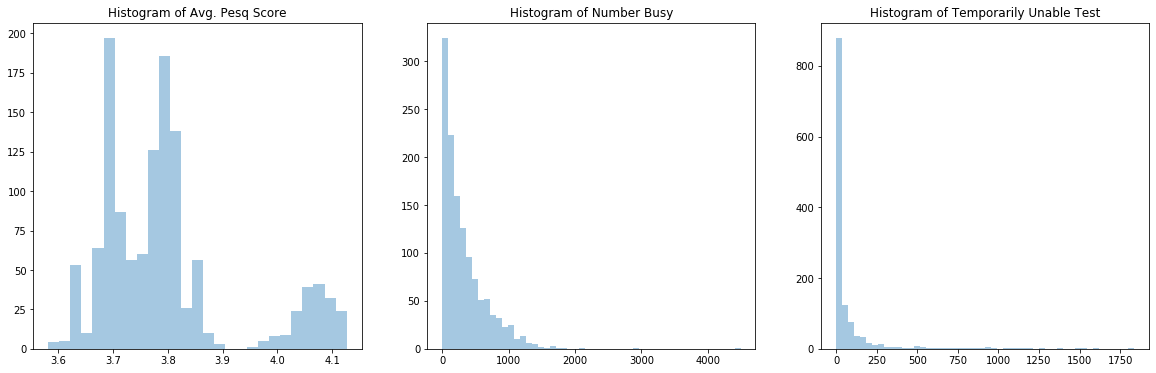

In [7]:
# Create figure with two subplots
fig = plt.figure(figsize=(20,6))

# Plot avg_pesq_score
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("Histogram of Avg. Pesq Score")
sns.distplot(df['avg_pesq_score'], kde=False, axlabel=False, label='avg_pesq_score')

# Plot number_busy
ax1 = fig.add_subplot(1, 3, 2)
ax1.set_title("Histogram of Number Busy")
sns.distplot(df['number_busy'], kde=False, axlabel=False, label='number_busy')

# Plot temporarily_unable_test
ax1 = fig.add_subplot(1, 3, 3)
ax1.set_title("Histogram of Temporarily Unable Test")
sns.distplot(df['temporarily_unable_test'], kde=False,axlabel=False, label='temporarily_unable_test')

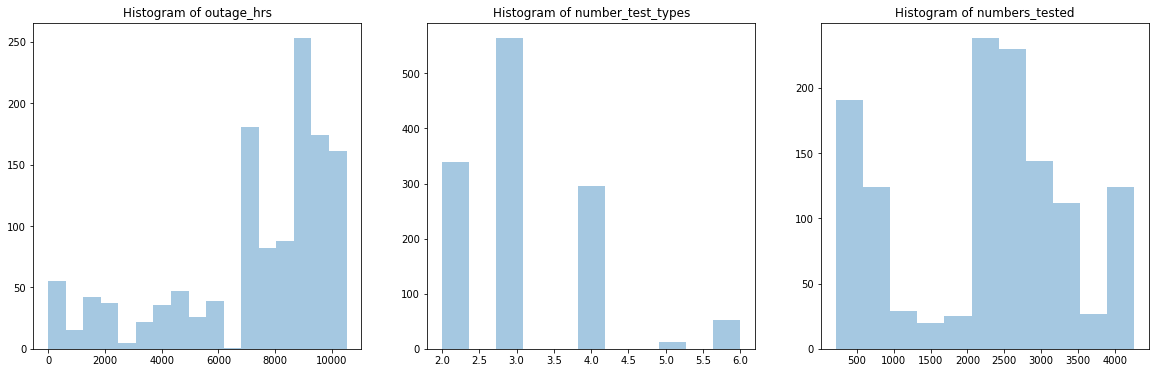

In [8]:
# Create figure with two subplots
fig = plt.figure(figsize=(20,6))

# Plot outage_hrs
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("Histogram of outage_hrs")
sns.distplot(df['outage_hrs'], kde=False,axlabel=False, label='outage_hrs')

# Plot number_test_types
ax1 = fig.add_subplot(1, 3, 2)
ax1.set_title("Histogram of number_test_types")
sns.distplot(df['number_test_types'], kde=False,axlabel=False, label='number_test_types')

# Plot numbers_tested
ax2 = fig.add_subplot(1, 3, 3)
ax2.set_title("Histogram of numbers_tested")
sns.distplot(df['numbers_tested'], kde=False,axlabel=False, label='numbers_tested')

/home/shanebowen/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shanebowen/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


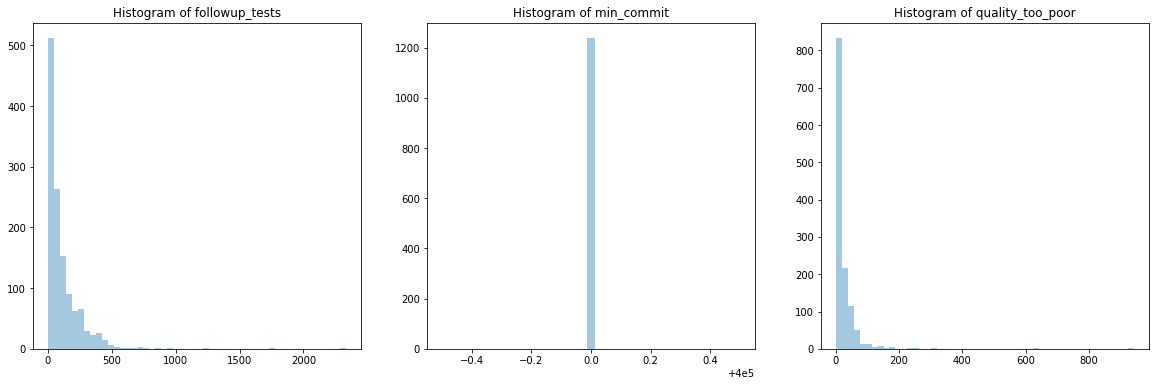

In [9]:
# Create figure with two subplots
fig = plt.figure(figsize=(20,6))

# Plot followup_tests
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("Histogram of followup_tests")
sns.distplot(df['followup_tests'], kde=False,axlabel=False, label='followup_tests')

# Plot min_commit
ax1 = fig.add_subplot(1, 3, 2)
ax1.set_title("Histogram of min_commit")
sns.distplot(df['min_commit'], kde=False,axlabel=False, label='min_commit')

# Plot quality_too_poor
ax2 = fig.add_subplot(1, 3, 3)
ax2.set_title("Histogram of quality_too_poor")
sns.distplot(df['quality_too_poor'], kde=False,axlabel=False, label='quality_too_poor')

#### From the plots above we can see the columns with extreme values or inbalanced distribution are number_busy, temporarily_unable_test, outage_hrs, numbers_tested, followup_tests, quality_too_poor

### Number Busy

In [10]:
df['number_busy'].describe()

count    1264.00000
mean      332.24288
std       350.85980
min         0.00000
25%        87.00000
50%       226.50000
75%       470.50000
max      4492.00000
Name: number_busy, dtype: float64

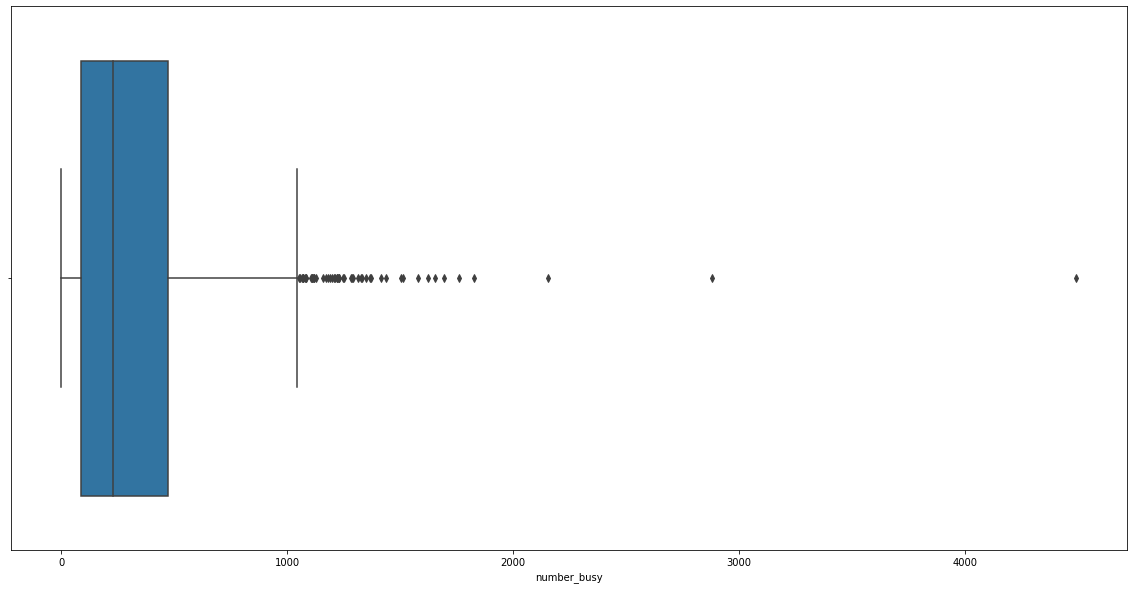

In [11]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['number_busy'])

In [12]:
print((df[['number_busy']] > 2000).sum())

number_busy    3
dtype: int64


In [13]:
# Get names of indexes for which column temporarily_unable_test has value 1000
df_original = df
index = df[ df['number_busy'] > 2000 ].index

# Delete these row indexes from dataFrame
df.drop(index , inplace=True)

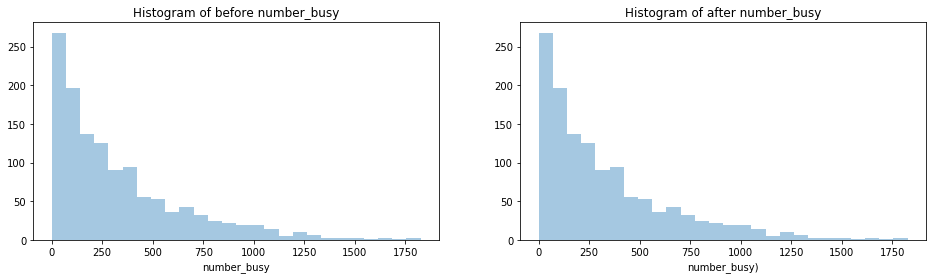

In [14]:
# plt.figure(figsize=(20, 10))
# sns.distplot(df['number_busy'], kde=False, axlabel=False, label='number_busy')
# plt.legend()
# plt.show()

# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot before
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of before number_busy")
ax1.set_xlabel('number_busy')
sns.distplot(df_original['number_busy'], kde=False, axlabel=False, label='number_busy')

# Plot after
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Histogram of after number_busy")
ax2.set_xlabel('number_busy)')
sns.distplot(df['number_busy'], kde=False, axlabel=False, label='number_busy')

### Temporarily Unable Test

In [15]:
df['temporarily_unable_test'].describe()

count    1261.000000
mean       73.046788
std       191.909094
min         0.000000
25%         0.000000
50%         7.000000
75%        56.000000
max      1838.000000
Name: temporarily_unable_test, dtype: float64

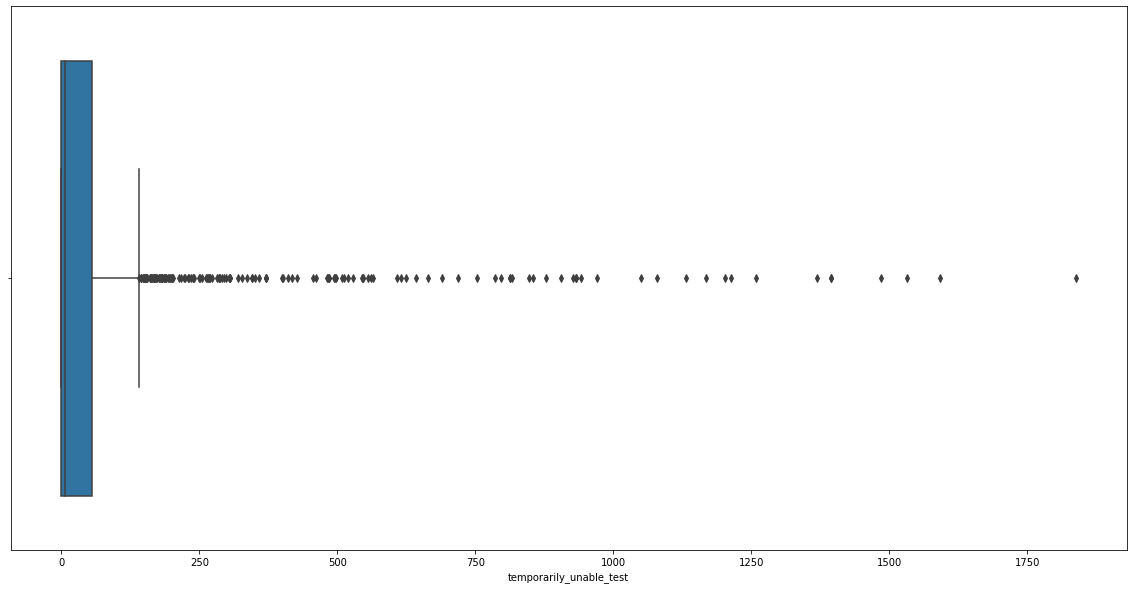

In [16]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['temporarily_unable_test'])

#### Above plot shows alot of extrame values outside the 75% quartile. In particular there are quite a few outliers that are greater than 1000. Lets see how many points this effects. 

In [17]:
print((df[['temporarily_unable_test']] > 1000).sum())

temporarily_unable_test    14
dtype: int64


#### As we can see there 5 results over 1000. This is around ~0.68% of the dataset I can safely remove this as they will not have a big affect the model.

In [18]:
# Get names of indexes for which column temporarily_unable_test has value 1000
index = df[ df['temporarily_unable_test'] > 1000 ].index

# Delete these row indexes from dataFrame
df.drop(index , inplace=True)

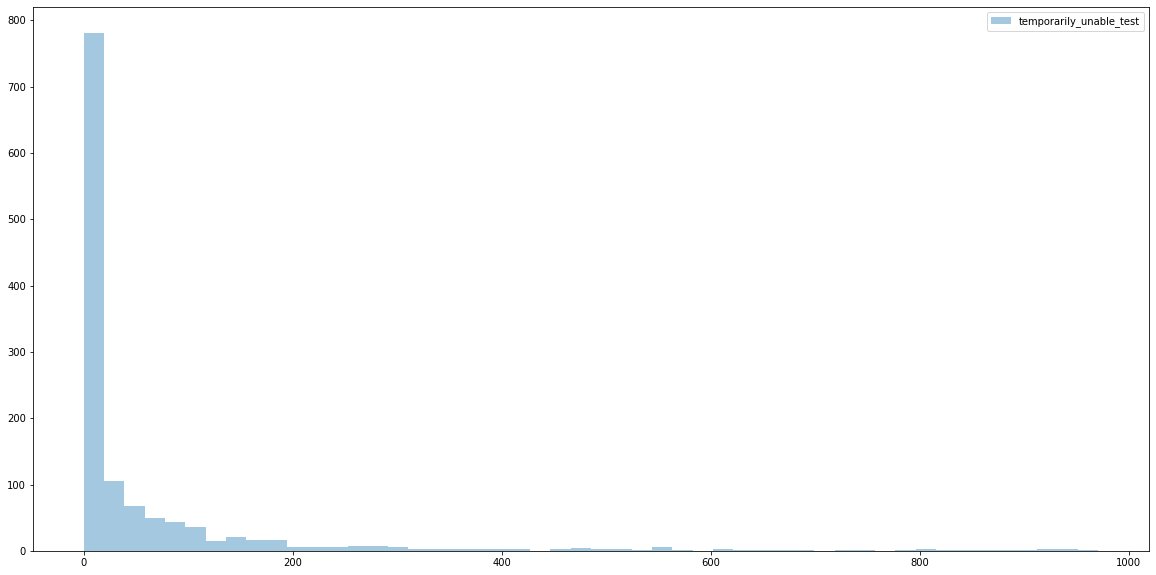

In [19]:
plt.figure(figsize=(20, 10))
sns.distplot(df['temporarily_unable_test'], kde=False, axlabel=False, label='temporarily_unable_test')
plt.legend()
plt.show()

### Follow-up_tests

In [20]:
# Use a log transformation to decrease the impact of extreme values in column followup_tests
df['followup_tests_log'] = np.log(df['followup_tests'] + 1)

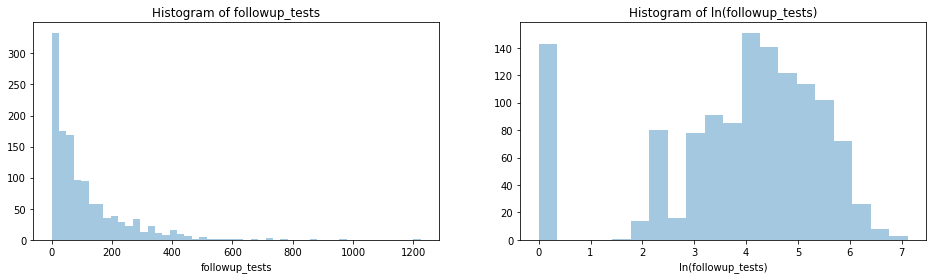

In [21]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot Balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of followup_tests")
ax1.set_xlabel('followup_tests')
sns.distplot(df['followup_tests'], kde=False, axlabel=False, label='followup_tests')

# Plot duration
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Histogram of ln(followup_tests)")
ax2.set_xlabel('ln(followup_tests)')
sns.distplot(df['followup_tests_log'], kde=False, axlabel=False, label='ln(followup_tests)')

#### Logs can also be used to reduce the impact of outliers in our model without losing information

### Quality Too Poor

In [22]:
df['quality_too_poor'].describe()

count    1247.000000
mean       21.489174
std        43.020037
min         0.000000
25%         3.000000
50%        10.000000
75%        26.000000
max       943.000000
Name: quality_too_poor, dtype: float64

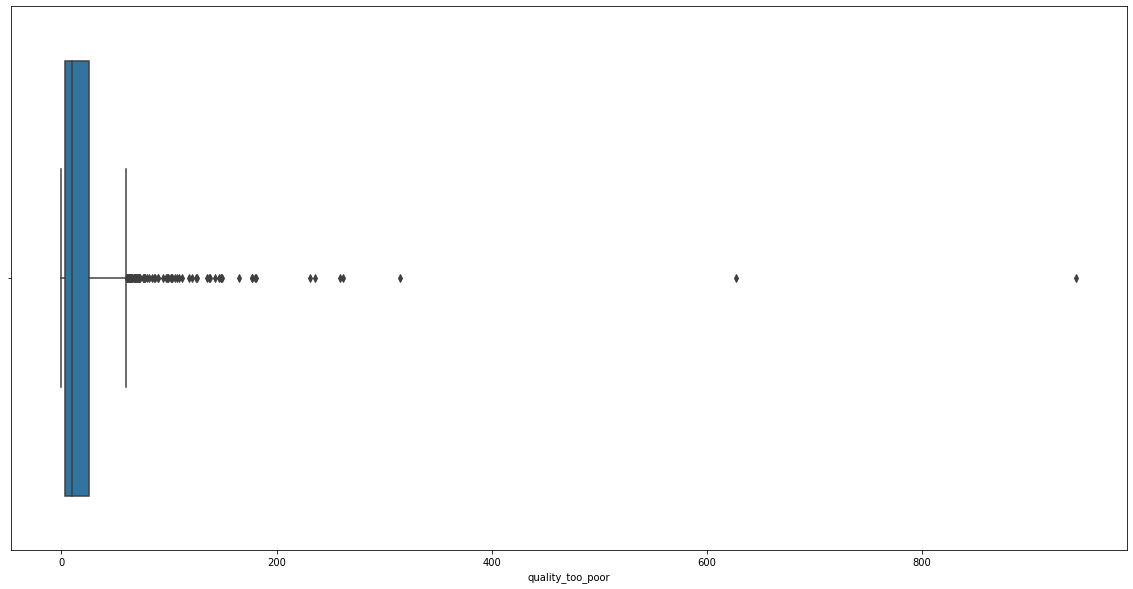

In [23]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['quality_too_poor'])

In [24]:
print((df[['quality_too_poor']] > 300).sum())

quality_too_poor    3
dtype: int64


In [25]:
# Get names of indexes for which column outage_hrs has value < 1000 
index = df[ df['quality_too_poor'] > 300 ].index

# Delete these row indexes from dataFrame
df.drop(index , inplace=True)

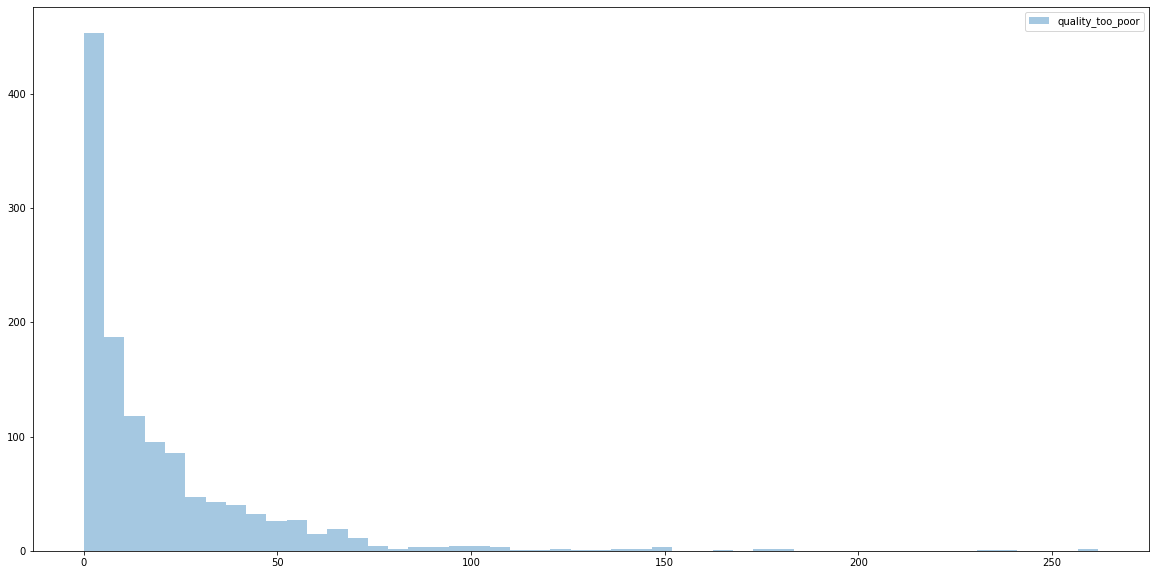

In [26]:
plt.figure(figsize=(20, 10))
sns.distplot(df['quality_too_poor'], kde=False, axlabel=False, label='quality_too_poor')
plt.legend()
plt.show()

### Outage Hrs

In [27]:
# Use a log transformation to decrease the impact of extreme values in column followup_tests
df['outage_hrs_log'] = np.log(df['outage_hrs'])

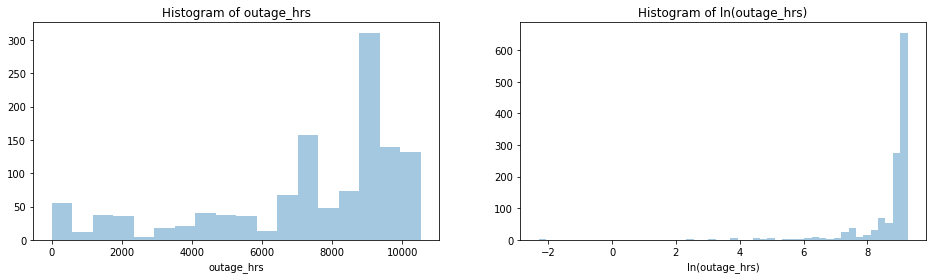

In [28]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot Balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of outage_hrs")
ax1.set_xlabel('outage_hrs')
sns.distplot(df['outage_hrs'], kde=False, axlabel=False, label='outage_hrs')

# Plot duration
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Histogram of ln(outage_hrs)")
ax2.set_xlabel('ln(outage_hrs)')
sns.distplot(df['outage_hrs_log'], kde=False, axlabel=False, label='ln(outage_hrs)')

### Numbers Tested

In [29]:
# Use a log transformation to decrease the impact of extreme values in column followup_tests
df['numbers_tested_log'] = np.log(df['numbers_tested'])

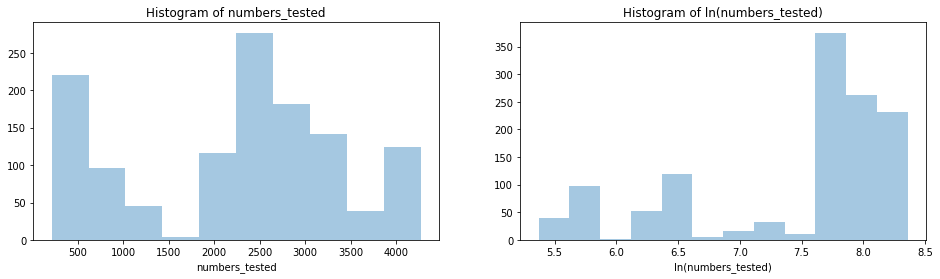

In [30]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot Balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of numbers_tested")
ax1.set_xlabel('numbers_tested')
sns.distplot(df['numbers_tested'], kde=False, axlabel=False, label='numbers_tested')

# Plot duration
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Histogram of ln(numbers_tested)")
ax2.set_xlabel('ln(numbers_tested)')
sns.distplot(df['numbers_tested_log'], kde=False, axlabel=False, label='ln(numbers_tested_log)')

#### As we have created new feature for number_busy, followup_tests, outage_hrs we can drop these feature

In [31]:
#df.drop(['followup_tests','outage_hrs', 'numbers_tested'], inplace=True, axis=1)

## D. Linear Regression, Distribution, Hoeffding Equation

In [32]:
# lets define our input features
X = np.vstack((df['numbers_tested_log'], df['is_weekend'], df['outage_hrs_log'])).T

# lets also define our output feature
Y = np.hstack((df['volume_tests']))

# Split data set into training and test data
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#fit training data on linear regression model
clf = LinearRegression().fit(xTrain, yTrain)

#Calculate Ein and Eout
Ein = 1 - clf.score(xTrain, yTrain)
Eout = 1 - clf.score(xTest, yTest)
print(Ein)
print(Eout)

0.22094509853748878
0.21434452256608316


In [33]:
def experiment(users, weights, N, df):
    outcomes = []
    for i in range(users):
        # lets choose a sample from dataset
        sample = df.sample(n=N)
        # lets define our input features from the random sample
        X = np.vstack((sample['numbers_tested_log'], sample['is_weekend'], sample['outage_hrs_log'])).T

        # lets also define our output feature from our random sample
        Y = np.vstack(((sample['volume_tests'])))

        # calculate in-sample error
        Ein = 1 - clf.score(X, Y)
        
        # add in sample error to outcome list
        outcomes.append(Ein)
    
    v_1 = outcomes[0] 
    v_rand = outcomes[rnd.randint(0,users-1)]
    v_min = min(outcomes)
    
    return v_1,v_rand,v_min

In [34]:
users = len(X)
N=10
repeats = 100

dist_1 = []
dist_rand=[]
dist_min=[]
lists = [dist_1, dist_rand, dist_min]

#d = np.column_stack((X,y))
#df = pd.DataFrame(data=d, dtype=np.int8)

for e in range(repeats):
    for x, lst in zip(experiment(users, clf, N, df), lists):
        lst.append(x)

# plt.figure(figsize=(20, 10))
# plt.hist(lists[0])
# plt.title('Distribution first row')
# plt.show()

# plt.figure(figsize=(20, 10))
# plt.hist(lists[1])
# plt.title('Distribution random row')
# plt.show()

# plt.figure(figsize=(20, 10))
# plt.hist(lists[2])
# plt.title('Distribution of min row')
# plt.show()

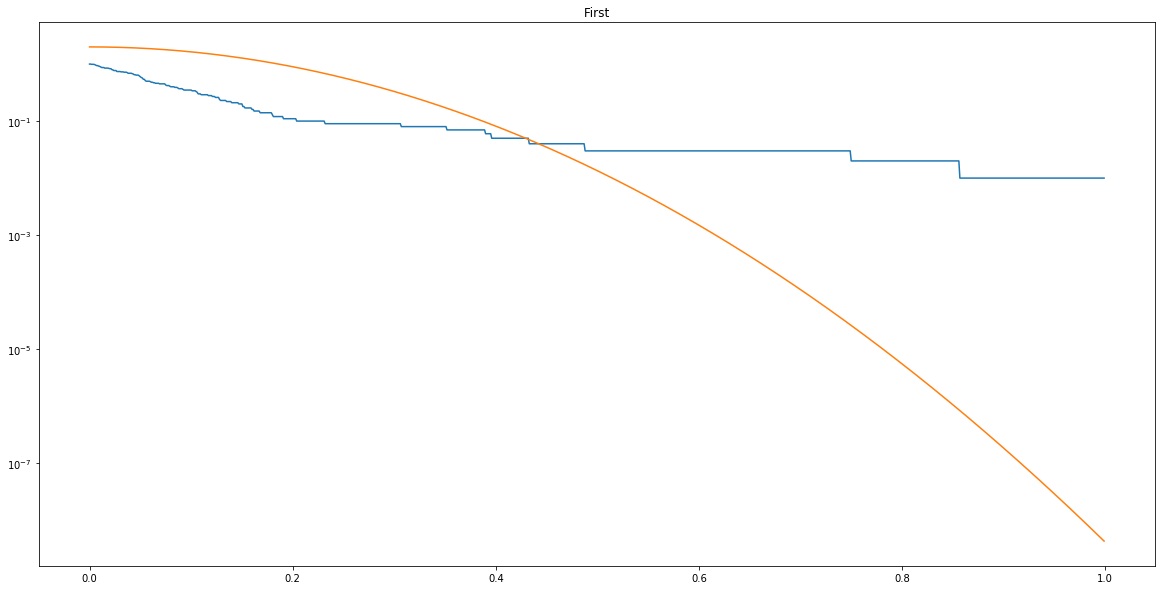

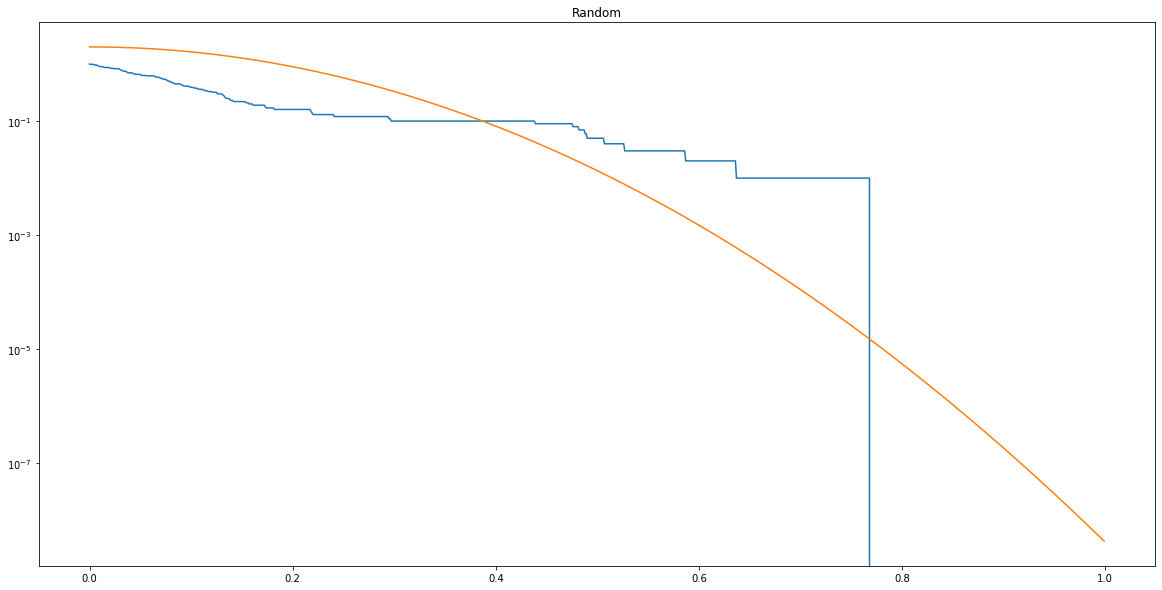

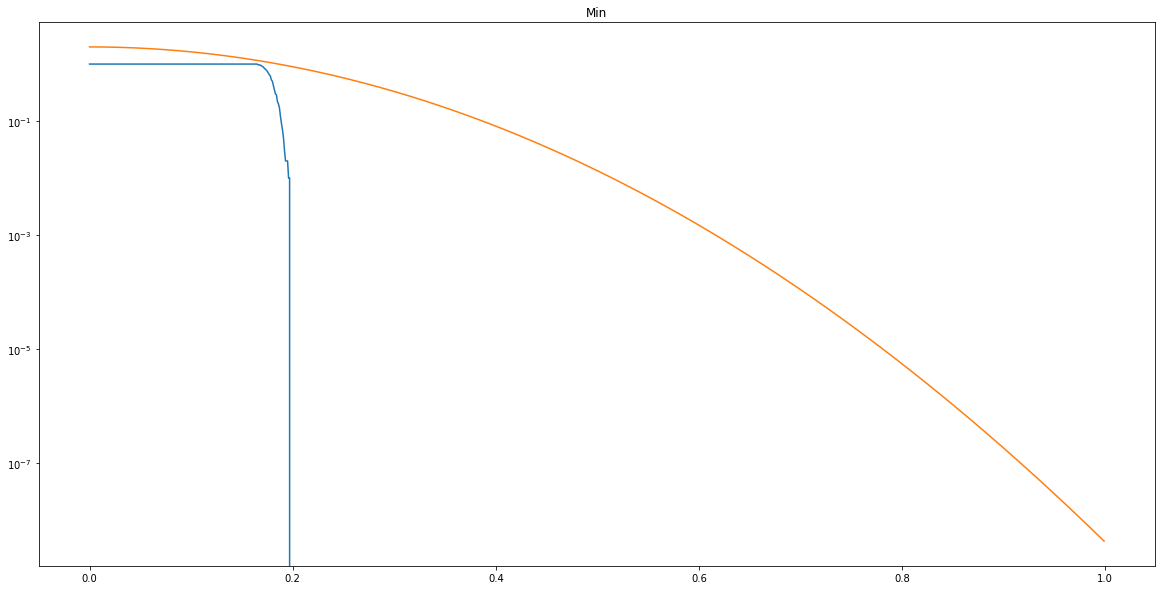

In [35]:
titles = ["First", "Random", "Min"]
dvc = len(X[0])
for d in range(0,3):
    dist = lists[d]
    prob_epsilon=[]
    epsilons = np.arange(0, 1, 0.001)
    for e in epsilons:
        prob_epsilon.append(len([1 for i in dist if abs(i-Eout) > e])/len(dist))
    
    plt.figure(figsize=(20, 10))
    plt.plot(epsilons, prob_epsilon)
    plt.plot(epsilons, [2*math.exp(-2*e**2*N) for e in epsilons])
    #plt.plot(epsilons, [4*((2*N)**dvc+1)*math.exp(-(1/8)*e**2*N) for e in epsilons]) 
    plt.yscale('log')
    plt.title(titles[d])
    plt.show

### Hoeffding Equation - Is Learning Feasible?
#### The Random & Min tend to obey Hoeffding bound, while First does not. If I tweak my input features could I get my results to be more consistent?

## E. Plotting Learning Curves & Exploring Other Machine Learning Algorithms

In [36]:
X = np.vstack((df['numbers_tested_log'], df['is_weekend'], df['outage_hrs_log'])).T
Y = np.hstack(((df['volume_tests'])))

In [37]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

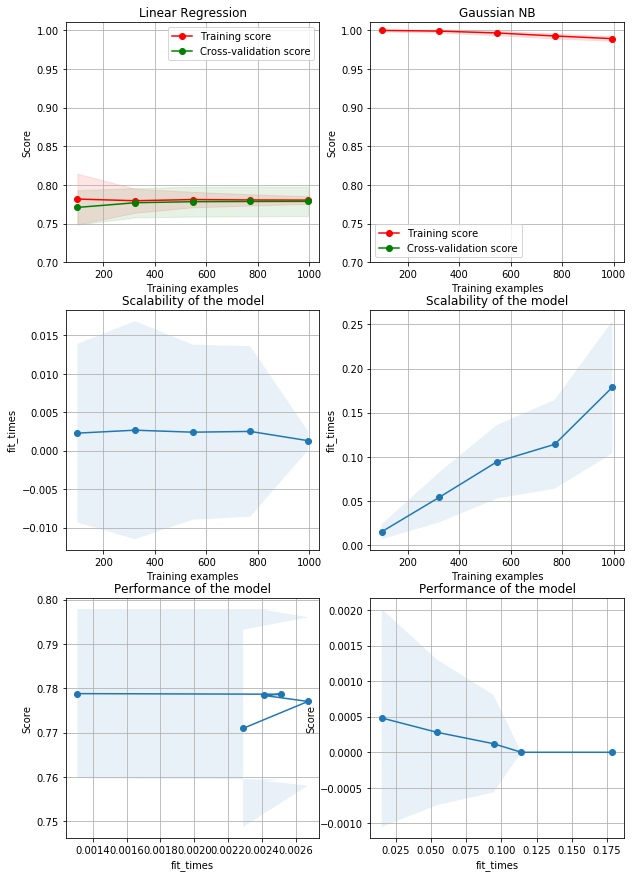

In [38]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Linear Regression"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X, Y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = "Gaussian NB"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, Y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

#### Linear Regression graphs looks pretty good and I can see low variance in between training and validation data. This means the model is performing well on the test data. I might try RNN so I can compare the two, but not sure how straightforward it will be to do this.